<a href="https://colab.research.google.com/github/shankar92/P775dm3/blob/master/palette_video_processing_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Note: Replace these values with **your** API key and Subscription Plan, otherwise, you'll get a 404 error.
palette_api_key = 'pUUFYwjqZQGSffYk5E2iarstrasta' #@param {type:"string"}
plan = 'Video Colorization Tester' #@param ["Video Colorization Tester", "Enthusiast Video Colorization", "Studio Video Colorization", "Business Video Colorization"]



# Getting started

1. Subscribe to a Plan
In the settings above select the plan you've subscribed to. For reference, see the ['Product catalog'](https://platform.palette.fm/) . It's 'Video Colorization Tester' or 'Enthusiast Video Colorization', or 'Studio Video Colorization'

2. Locate your API Key
Sign up here and subscribe to a plan. Go to ['My API keys'](https://platform.palette.fm/keys). Add the Primary API Key below (Example: VMyHZHDnMXnm9nzJk2dUQ6TYYJnTEHH)

3. Install libraries and helper functions
Click on the play button in the top left corner on the below five cells, until you reach the next text section. [Here's an introduction to Colab Notebooks.](https://colab.research.google.com/?utm_source=scs-index)

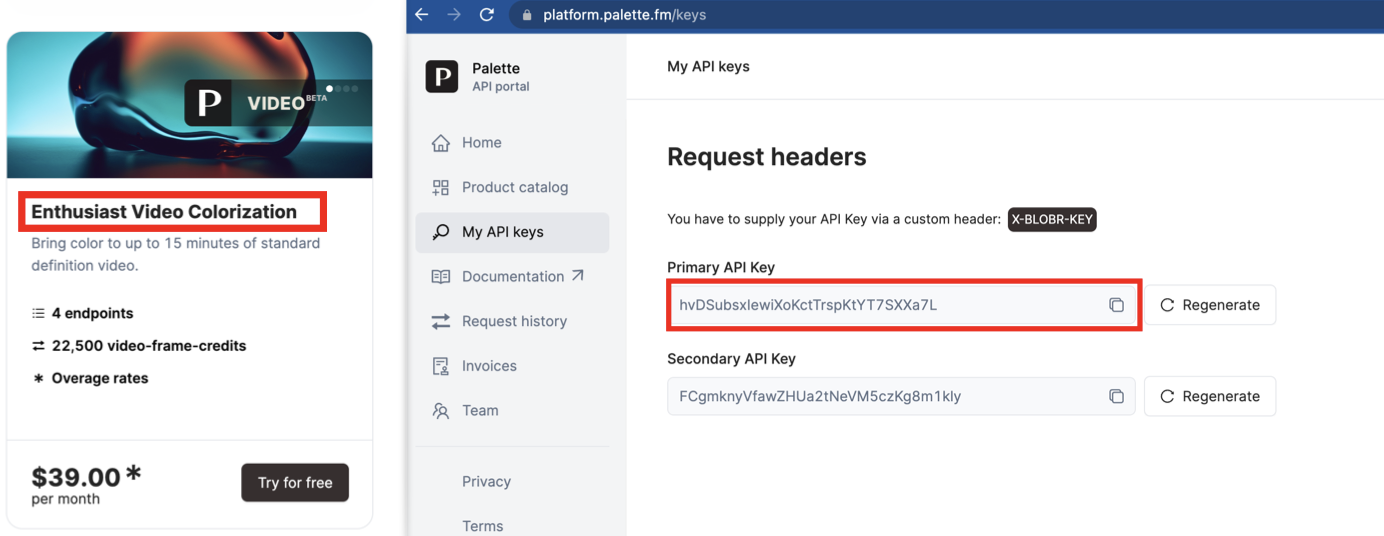


In [2]:
#@title Install libraries
!pip install ffmpeg-python yt-dlp opencv-python>=4.2.0.32 Pillow tornado fastprogress

In [3]:
from IPython.core.inputtransformer2 import PromptStripper
#@title Load helper functions
# Ported from: https://github.com/jantic/DeOldify/blob/master/VideoColorizerColab.ipynb

# Create a logger named 'Prompt' and set level
import logging
video_logger = logging.getLogger('[Prompt]')
video_logger.setLevel(logging.DEBUG)

# Create a handler for the logger and add it in one line
file_handler = logging.FileHandler('log_file.log')
video_logger.addHandler(file_handler)
#video_logger.addHandler(logging.StreamHandler())
with open('log_file.log', 'w'):
    pass

import requests
import uuid
import json
import os
import requests
from PIL import Image
from io import BytesIO
import time
import io
import math
import base64
import re
from os import path
import shutil
from pathlib import Path
from natsort import natsorted
from fastprogress.fastprogress import master_bar, progress_bar

import matplotlib.pyplot as plt
import numpy as np
import string
import os
from IPython import display as ipythondisplay
from IPython.display import display, Image, clear_output, HTML

import time

def get_subscription_id(plan):
    if plan == "Video Colorization Tester":
        return "video-colorization-tester"
    elif plan == "Business Video Colorization":
        return "4kbpx2mgp21vqsk7"
    elif plan == "Studio Video Colorization":
        return "studio-video-colorization"
    elif plan == "Enthusiast Video Colorization":
        return "enthusiast-video"
    else:
        return None

plan_url = get_subscription_id(plan)
from matplotlib.axes import Axes
from PIL import Image
import ffmpeg
import yt_dlp as youtube_dl
import requests
from io import BytesIO
import base64
from IPython.display import HTML
from IPython.display import Image as ipythonimage
import cv2



file_formats = [
    "str", "aa", "aac", "aax", "ac3", "acm", "adf", "adp", "dtk", "ads",
    "ss2", "adx", "aea", "afc", "aix", "al", "ape", "apl", "mac", "aptx",
    "aptxhd", "aqt", "ast", "obu", "avi", "avr", "avs", "avs2", "avs3",
    "bfstm", "bcstm", "binka", "bit", "bmv", "brstm", "cdg", "cdxl", "xl",
    "c2", "302", "daud", "str", "adp", "dav", "dss", "dts", "dtshd", "dv",
    "dif", "cdata", "eac3", "paf", "fap", "flm", "flac", "flv", "fsb",
    "fwse", "g722", "722", "tco", "rco", "g723_1", "g729", "genh", "gsm",
    "h261", "h26l", "h264", "264", "avc", "hca", "hevc", "h265", "265",
    "idf", "ifv", "cgi", "ipu", "sf", "ircam", "ivr", "kux", "669", "amf",
    "ams", "dbm", "digi", "dmf", "dsm", "dtm", "far", "gdm", "ice", "imf",
    "it", "j2b", "m15", "mdl", "med", "mmcmp", "mms", "mo3", "mod", "mptm",
    "mt2", "mtm", "nst", "okt", "plm", "ppm", "psm", "pt36", "ptm", "s3m",
    "sfx", "sfx2", "st26", "stk", "stm", "stp", "ult", "umx", "wow", "xm",
    "xpk", "flv", "dat", "lvf", "m4v", "mkv", "mk3d", "mka", "mks", "webm",
    "mca", "mcc", "mjpg", "mjpeg", "mpo", "j2k", "mlp", "mods", "moflex",
    "mov", "mp4", "m4a", "3gp", "3g2", "mj2", "psp", "m4b", "ism", "ismv",
    "isma", "f4v", "mp2", "mp3", "m2a", "mpa", "mpc", "mjpg", "txt", "mpl2",
    "sub", "msf", "mtaf", "ul", "musx", "mvi", "mxg", "v", "nist", "sph",
    "nsp", "nut", "obu", "ogg", "oma", "omg", "aa3", "pjs", "pvf", "yuv",
    "cif", "qcif", "rgb", "rt", "rsd", "rsd", "rso", "sw", "sb", "smi",
    "sami", "sbc", "msbc", "sbg", "scc", "sdr2", "sds", "sdx", "ser", "sga",
    "shn", "vb", "son", "imx", "sln", "mjpg", "stl", "sub", "sub", "sup",
    "svag", "svs", "tak", "thd", "tta", "ans", "art", "asc", "diz", "ice",
    "nfo", "txt", "vt", "ty", "ty+", "uw", "ub", "v210", "yuv10", "vag",
    "vc1", "rcv", "viv", "idx", "vpk", "txt", "vqf", "vql", "vqe", "vtt",
    "wsd", "xmv", "xvag", "yop", "y4m"
]

audio_codec_mapping = {
    'mp4': 'aac',
    'avi': 'mp3',
    'mkv': 'vorbis',
    'flv': 'mp3',
    'm4v': 'aac',
    'webm': 'opus',
    'mov': 'aac',
    '3gp': 'aac',
    '3g2': 'aac',
    'ogg': 'vorbis',
    'flac': 'flac',
    'mp3': 'mp3',
    'mp2': 'mp2',
    'mka': 'vorbis',
    'aac': 'aac',
    'aax': 'aac',
    'ac3': 'ac3',
    'ape': 'ape',
    'wav': 'pcm',
    'dts': 'dts',
    'al': 'pcm',
    'm4a': 'aac',
    'eac3': 'eac3',
    'amr': 'amr-nb',
    'm2a': 'mp2',
    'mpa': 'mp2',
    'm4b': 'aac',
    'adx': 'adx',
    'ast': 'ast',
    'afc': 'afc',
    'dtshd': 'dts-hd',
    'h265': 'hevc',
    'h264': 'avc',
    'h261': 'h.261',
    'h26l': 'h.26l',
    'hevc': 'hevc',
    'mvc': 'mvc',
    'opus': 'opus',
    'vorbis': 'vorbis',
    'wavpack': 'wavpack',
    'mjpg': 'mjpeg',
    'mjpeg': 'mjpeg',
    'mlp': 'truehd',
    'mods': 'mods',
    'oma': 'atrac3',
    'oma': 'e-atrac3',
    'oma': 'atrac-x',
    'oma': 'atrac3plus',
    'aa3': 'atrac3',
    'aa3': 'e-atrac3',
    'aa3': 'atrac-x',
    'aa3': 'atrac3plus',
    'tta': 'tta'
}

class VideoColorizer:
    def __init__(self):

        workfolder = Path('./video')
        self.source_folder = workfolder / "source"
        self.bwframes_root = workfolder / "bwframes"
        self.audio_root = workfolder / "audio"
        self.colorframes_root = workfolder / "colorframes"
        self.bwpreview_root = workfolder / "bwpreview"
        self.reference_folder = workfolder / "reference"
        self.result_folder = workfolder / "result"
        self.source_path = ""
        self.file_dict = {}
        self.create_folders()


    def _pick_file(self, frames, N: int) -> Path:
        # List and sort files
        files = sorted(frames)

        if not files:
            print("No files found.")
            return None

        # Return the N-th file or the last one
        if N <= len(files):
            return files[N-1]
        else:
            return files[-1]

    def create_folders(self):
        folders = [self.source_folder, self.bwframes_root, self.audio_root, self.colorframes_root, self.result_folder, self.reference_folder]
        for folder in folders:
            if not folder.exists():
                os.makedirs(folder)

    def _purge_images(self, dir):
        for f in os.listdir(dir):
            if re.search('.*?\.jpg', f):
                os.remove(os.path.join(dir, f))

    def _get_ffmpeg_probe(self, path:Path):
        try:
            probe = ffmpeg.probe(str(path))
            return probe
        except ffmpeg.Error as e:
            logging.error("ffmpeg error: {0}".format(e), exc_info=True)
            logging.error('stdout:' + e.stdout.decode('UTF-8'))
            logging.error('stderr:' + e.stderr.decode('UTF-8'))
            raise e
        except Exception as e:
            logging.error('Failed to instantiate ffmpeg.probe.  Details: {0}'.format(e), exc_info=True)
            raise e

    def _get_fps(self, source_path: Path) -> str:
        probe = self._get_ffmpeg_probe(source_path)
        stream_data = next(
            (stream for stream in probe['streams'] if stream['codec_type'] == 'video'),
            None,
        )

        round(eval(stream_data['avg_frame_rate']))
        return round(eval(stream_data['avg_frame_rate']))

    def _download_video_from_url(self, source_url, source_path: Path):
        if source_path.exists():
            source_path.unlink()
        #'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',

        ydl_opts = {
            'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
            'outtmpl': str(source_path),
            'retries': 30,
            'fragment-retries': 30
        }
        with youtube_dl.YoutubeDL(ydl_opts) as ydl:
            ydl.download([source_url])


    def _extract_raw_frames(self, source_path: Path, cut_start_second, cut_length_seconds, test_frames):

        if test_frames:
            bwframes_folder = self.bwpreview_root / (source_path.stem)
        else:
            bwframes_folder = self.bwframes_root / (source_path.stem)
        bwframe_path_template = str(bwframes_folder / '%5d.jpg')
        bwframes_folder.mkdir(parents=True, exist_ok=True)
        self._purge_images(bwframes_folder)

        if cut_start_second == 0 and cut_length_seconds == 0:
            process = (
                ffmpeg
                    .input(str(source_path))
                    .filter('scale', 'trunc(iw/2)*2', 'trunc(ih/2)*2') #.filter('scale', '640', '-2')
                    .output(str(bwframe_path_template), format='image2', vcodec='mjpeg', **{'q:v':'0'})
                    .global_args('-hide_banner')
                    .global_args('-nostats')
                    .global_args('-loglevel', 'info')
            )
        else:
            process = (
                ffmpeg
                    .input(str(source_path))
                    .trim(start=cut_start_second, end=(cut_start_second+cut_length_seconds))
                    .setpts('PTS-STARTPTS')
                    .filter('scale', 'trunc(iw/2)*2', 'trunc(ih/2)*2') #.filter('scale', '640', '-2')
                    .output(str(bwframe_path_template), format='image2', vcodec='mjpeg', **{'q:v':'0'})
                    .global_args('-hide_banner')
                    .global_args('-nostats')
                    .global_args('-loglevel', 'info')
            )

        try:
            process.run(capture_stdout=True, capture_stderr=True)
        except ffmpeg.Error as e:
            print('stdout:', e.stdout)
            print('stderr:', e.stderr)
            logging.error("ffmpeg error: {0}".format(e), exc_info=True)
            if e.stdout is not None:
                logging.error('stdout:' + e.stdout.decode('UTF-8'))
            if e.stderr is not None:
                logging.error('stderr:' + e.stderr.decode('UTF-8'))
            raise e
        except Exception as e:
            logging.error('Errror while extracting raw frames from source video.  Details: {0}'.format(e), exc_info=True)
            raise e

    def _extract_prompt_from_frame(
        self, source_path: Path, filter_id: int = 1, extract_all: bool = False
    ):

        # Note: replace jpwfm2z1g587733t with your link (see your portal)
        url = "https://apis.palette.fm/" + plan_url + "/generate_video_frame_prompt"

        files = {
            'image': (str(source_path), open(str(source_path), 'rb'), 'image/jpeg')
        }

        all_prompts = "true" if extract_all else "false"

        data = {
          "standard_filter_id": str(filter_id), # 1-20, 0 is disabled
          "artistic_filter_id": "0", # 1-100, 0 is disabled
          "all_standard_filters": all_prompts, # return all 20 prompts
          "all_artistic_filters": "false", # return all 100 prompts
          "raw_captions": "false" # remove pre and post fix to the caption
        }

        # Note: Add your api key
        headers = {
          "X-BLOBR-KEY": palette_api_key
        }

        max_retries = 10
        delay = 60  # seconds

        for i in range(max_retries):
            try:
                response = requests.post(url, files=files, data=data, headers=headers)
                if response.status_code == 200:
                    prompt = json.loads(response.text)
                    break
                else:
                    logging.error(f"Attempt {i+1} failed. Status code: {response.status_code}. Retrying in {delay} seconds...")
                    time.sleep(delay)
                    delay += 60
            except Exception as e:
                logging.error(f"Attempt {i+1} failed due to exception: {e}. Retrying in {delay} seconds...")
                time.sleep(delay)
                delay += 60
        else:
            logging.error("Max retries exceeded. The operation could not be completed.")

        if extract_all:
            return prompt
        else:
            return str(prompt[0])

    def _colorize_raw_frames(
        self, colorize_data, source_path: Path, prompt: str = "", filter_id: int = 1, test_frames = False, reference_image_filename: str = "", test_image_id: int = 0
    ):
        # video_logger.info("Test image ID: " + str(test_image_id))
        # video_logger.info("Prompt: " + str(prompt))
        # video_logger.info("reference_image_filename: " + str(reference_image_filename))
        if test_frames:
            bwframes_folder = self.bwpreview_root / (source_path.stem)
        else:
            bwframes_folder = self.bwframes_root / (source_path.stem)

        if prompt == "" and reference_image_filename == "":
            frames = os.listdir(str(bwframes_folder))
            test_frame_filename = self._pick_file(frames, test_image_id)
            img_path = bwframes_folder / test_frame_filename
            # video_logger.info("Test Frame used: " + str(img_path))
            prompt = self._extract_prompt_from_frame(str(img_path), filter_id, False)

        test_frame_folder = self._create_test_frame_folder_name(prompt)
        ref_path = self.reference_folder / reference_image_filename

        bw_files = os.listdir(str(bwframes_folder))

        if reference_image_filename == "":
            video_logger.info("Prompt used: " + str(prompt))
            url = "https://apis.palette.fm/" + plan_url + "/colorize_video_frame_with_prompt"
        else:
            video_logger.info("Using reference image: " + reference_image_filename)
            url = "https://apis.palette.fm/" + plan_url + "/colorize_video_frame_with_reference_image"
            # bw_files = ["00001.jpg"]

        colorframes_folder = self.colorframes_root / (source_path.stem) if not test_frames else self.colorframes_root / test_frame_folder
        colorframes_folder.mkdir(parents=True, exist_ok=True)
        self._purge_images(colorframes_folder)


        for img in progress_bar(bw_files):
            img_path = bwframes_folder / img

            if os.path.isfile(str(img_path)):

                headers = {
                  "X-BLOBR-KEY": palette_api_key
                }

                data = colorize_data

                if reference_image_filename != "":
                    files = {
                        'image': (str(img_path), open(str(img_path), 'rb'), 'image/jpeg'),
                        'image_ref': (str(reference_image_filename), open(str(ref_path), 'rb'), 'image/jpeg')
                    }
                else:
                    files = {
                        'image': (str(img_path), open(str(img_path), 'rb'), 'image/jpeg')
                    }

                data['prompt'] = prompt
                max_retries = 10
                delay = 60  # seconds

                for i in range(max_retries):
                    try:
                        response = requests.post(url, files=files, data=data, headers=headers)
                        if response.status_code == 200:
                            with open(str(colorframes_folder / img), 'wb') as f:
                                f.write(response.content)
                                f.close()
                            break
                        else:
                            logging.error(f"Attempt {i+1} failed. Status code: {response.status_code}. Retrying in {delay} seconds...")
                            time.sleep(delay)
                            delay += 60
                    except Exception as e:
                        logging.error(f"Attempt {i+1} failed due to exception: {e}. Retrying in {delay} seconds...")
                        time.sleep(delay)
                        delay += 60
                else:
                    logging.error("Max retries exceeded. The operation could not be completed.")
                time.sleep(0.1)

        return prompt, colorframes_folder

    def _colorize_all_prompts(
        self, colorize_data, source_path: Path, test_image_id: int = 0
    ):

        bwframes_folder = self.bwpreview_root / (source_path.stem)
        test_frame_folder = self._create_test_frame_folder_name("All-Prompts-" + str(uuid.uuid4()))


        # video_logger.info("Prompt: " + str(prompt))
        # video_logger.info("reference_image_filename: " + str(reference_image_filename))

        video_logger.info("Test image ID: " + str(test_image_id))
        frames = os.listdir(str(bwframes_folder))
        test_frame_filename = self._pick_file(frames, test_image_id)
        img_path = bwframes_folder / test_frame_filename
        video_logger.info("Test image file: " + str(img_path))
        prompts = self._extract_prompt_from_frame(str(img_path), 0, True)

        colorframes_folder = self.colorframes_root / test_frame_folder
        colorframes_folder.mkdir(parents=True, exist_ok=True)

        self._purge_images(colorframes_folder)


        for img_i, prompt in enumerate(progress_bar(prompts)):
            img_path = bwframes_folder / test_frame_filename

            if os.path.isfile(str(img_path)):

                url = "https://apis.palette.fm/" + plan_url + "/colorize_video_frame_with_prompt"
                headers = {
                  "X-BLOBR-KEY": palette_api_key
                }

                data = colorize_data

                files = {
                    'image': (str(img_path), open(str(img_path), 'rb'), 'image/jpeg')
                }

                data['prompt'] = prompt

                max_retries = 10
                delay = 60  # seconds

                for i in range(max_retries):
                    try:
                      response = requests.post(url, files=files, data=data, headers=headers)
                      if response.status_code == 200:
                          image_number = img_i+1
                          formatted_number = "{:03d}".format(image_number)
                          save_img= "{}.jpg".format(formatted_number)
                          with open(str(colorframes_folder / save_img), 'wb') as f:
                              f.write(response.content)
                              f.close()
                          break
                      else:
                          logging.error(f"Attempt {i+1} failed. Status code: {response.status_code}. Retrying in {delay} seconds...")
                          time.sleep(delay)
                          delay += 60
                    except Exception as e:
                        logging.error(f"Attempt {i+1} failed due to exception: {e}. Retrying in {delay} seconds...")
                        time.sleep(delay)
                        delay += 60
                else:
                    logging.error("Max retries exceeded. The operation could not be completed.")
                time.sleep(0.1)

        return prompts, colorframes_folder

    def _build_video(self, source_path: Path, cut_start_second, cut_length_seconds) -> Path:

        file_extension = source_path.suffix[1:]  # Extract file extension without the dot

        # Check if file_extension is valid
        if file_extension not in file_formats:
            raise ValueError(f"Unsupported file format: {file_extension}")

        # Adjust colorized_path to be based on the file_extension
        colorized_path = self.result_folder / (
            source_path.name.replace(f'.{file_extension}', f'_no_audio.{file_extension}')
        )


        colorframes_folder = self.colorframes_root / (source_path.stem)
        colorframes_path_template = str(colorframes_folder / '%5d.jpg')
        colorized_path.parent.mkdir(parents=True, exist_ok=True)
        if colorized_path.exists():
            colorized_path.unlink()
        fps = self._get_fps(source_path)

        video_logger.info(str(fps))
        process = (
            ffmpeg
              .input(str(colorframes_path_template), format='image2', vcodec='mjpeg', framerate=fps)
              .filter('scale', 'trunc(iw/2)*2', 'trunc(ih/2)*2') #.filter('scale', '640', '-2') #.filter('scale', 'trunc(iw/2)*2', 'trunc(ih/2)*2')
              .output(str(colorized_path), crf=17, vcodec='libx264')
              .global_args('-hide_banner')
              .global_args('-nostats')
              .global_args('-loglevel', 'info')
        )

        try:
            process.run(capture_stdout=True, capture_stderr=True)
        except ffmpeg.Error as e:
            print('stdout:', e.stdout)
            print('stderr:', e.stderr)
            logging.error("ffmpeg error: {0}".format(e), exc_info=True)
            if e.stdout is not None:
                logging.error('stdout:' + e.stdout.decode('UTF-8'))
            if e.stderr is not None:
                logging.error('stderr:' + e.stderr.decode('UTF-8'))
            raise e
        except Exception as e:
            logging.error('Errror while building output video.  Details: {0}'.format(e), exc_info=True)
            raise e


        result_path = self.result_folder / source_path.name
        if result_path.exists():
            result_path.unlink()
        # making copy of non-audio version in case adding back audio doesn't apply or fails.
        shutil.copyfile(str(colorized_path), str(result_path))

        # adding back sound here
        file_extension = source_path.suffix[1:]  # Extract file extension without the dot

        audio_codec = audio_codec_mapping.get(file_extension, 'aac')
        audio_file = Path(str(source_path).replace(f'.{file_extension}', '.' + audio_codec))

        # Get the audio codec for the current file format. If not found, default to 'aac'.


        if audio_file.exists():
            audio_file.unlink()

        if cut_start_second == 0 and cut_length_seconds == 0:
            os.system(
                'ffmpeg -y -i "'
                + str(source_path)
                + ' -vn -acodec ' + audio_codec + ' "'
                + str(audio_file)
                + '"'
                + ' -hide_banner'
                + ' -nostats'
                + ' -loglevel error'
            )

        else:
            os.system(
                'ffmpeg -y -i "'
                + str(source_path)
                + '" -ss '
                + str(cut_start_second)
                + ' -t '
                + str(cut_length_seconds)
                + ' -vn -acodec ' + audio_codec + ' "'
                + str(audio_file)
                + '" -hide_banner -nostats -loglevel error'
            )

        if audio_file.exists():
            os.system(
                'ffmpeg -y -i "'
                + str(colorized_path)
                + '" -i "'
                + str(audio_file)
                + '" -shortest -c:v copy -c:a ' + audio_codec + ' -b:a 256k "'
                + str(result_path)
                + '" -hide_banner -nostats -loglevel error'
            )

        video_logger.info('Video created here: ' + str(result_path))
        return result_path

    def _delete_frames(self, source_path):
        # List all files in source_path
        all_files = [f for f in os.listdir(source_path) if f.endswith('.jpg')]

        # Sort files naturally (i.e., "2" before "10")
        all_files = natsorted(all_files)

        total_files = len(all_files)

        if total_files > 20:
            # Calculate the step size for even sampling
            step_size = total_files // 20

            # Select 20 files evenly from the list
            sampled_files = [all_files[i] for i in range(0, total_files, step_size)]

            # Delete non-sampled files
            for file_name in all_files:
                if file_name not in sampled_files:
                    os.remove(os.path.join(source_path, file_name))
        else:
            print("Not enough files for sampling. Required: 20, Found: ", total_files)

    def _create_test_frame_folder_name(self, input_str):

        #lower_str = input_str.lower()
        #no_punctuation_str = lower_str.translate(str.maketrans('', '', string.punctuation))
        #final_str = no_punctuation_str.replace(' ', '-')

        return str(uuid.uuid4())

    def _update_file_dict(self, filename, start_cut, duration):

        # Check if the filename already exists in the dictionary
        if filename in self.file_dict:
            if self.file_dict[filename] == (start_cut, duration):
                return False
            else:
                self.file_dict[filename] = (start_cut, duration)
                return True
        else:
            # If the filename does not exist, add it to the dictionary and return True
            self.file_dict[filename] = (start_cut, duration)
            return True

    def colorize_from_url(
        self,
        colorize_data,
        source_url,
        file_name: str,
        prompt: str = "",
        filter_id: int = 1,
        cut_start_second: int = 0,
        cut_length_seconds: int = 0,
        reference_image_filename: str = ""

    ) -> Path:
        source_path = self.source_folder / file_name

        if not source_path.exists():
            self._download_video_from_url(source_url, source_path)
        return self._colorize_from_path(
            colorize_data, source_path, prompt=prompt,  filter_id=filter_id, cut_start_second=cut_start_second, cut_length_seconds=cut_length_seconds, reference_image_filename=reference_image_filename
        )

    def colorize_test_frames_from_url(
        self,
        colorize_data,
        source_url,
        file_name: str,
        prompt: str = "",
        filter_id: int = 1,
        cut_start_second: int = 0,
        cut_length_seconds: int = 0,
        mode: str = "frames",
        reference_image_filename: str = "",
        test_image_id: int = 0

    ) -> Path:
        source_path = self.source_folder / file_name
        if not source_path.exists():
            self._download_video_from_url(source_url, source_path)
        return self._colorize_test_frames_from_path(
            colorize_data, source_path, prompt=prompt,  filter_id=filter_id, cut_start_second=cut_start_second, cut_length_seconds=cut_length_seconds, mode=mode, reference_image_filename=reference_image_filename, test_image_id=test_image_id
        )

    def colorize_test_frames_from_file_name(
        self,
        colorize_data,
        file_name: str,
        prompt: str = "",
        filter_id: int = 1,
        cut_start_second: int = 0,
        cut_length_seconds: int = 0,
        mode: str = "frames",
        reference_image_filename: str = "",
        test_image_id: int = 0

    ) -> Path:
        source_path = self.source_folder / file_name
        return self._colorize_test_frames_from_path(
            colorize_data, source_path, prompt=prompt, filter_id=filter_id, cut_start_second=cut_start_second, cut_length_seconds=cut_length_seconds, mode=mode, reference_image_filename=reference_image_filename, test_image_id=test_image_id
        )

    def _colorize_test_frames_from_path(
        self,
        colorize_data,
        source_path: Path,
        prompt: str = "",
        filter_id: int = 1,
        cut_start_second: int = 0,
        cut_length_seconds: int = 0,
        mode: str = "frames",
        reference_image_filename: str = "",
        test_image_id: int = 0

    ) -> Path:


        if not source_path.exists():
            raise Exception(
                'Video at path specfied, ' + str(source_path) + ' could not be found.'
            )

        bwframes_folder = self.bwpreview_root / (source_path.stem)
        video_logger.info("BW test folder: " + str(bwframes_folder))

        if_extract_frames = self._update_file_dict('preview_'+str(source_path), cut_start_second, cut_length_seconds)
        if if_extract_frames:
            self._extract_raw_frames(source_path, cut_start_second=cut_start_second, cut_length_seconds=cut_length_seconds, test_frames=True)
            self._delete_frames(bwframes_folder)
        if mode == "frames":
            return self._colorize_raw_frames(
                colorize_data, source_path, prompt=prompt, filter_id=filter_id, test_frames=True, reference_image_filename=reference_image_filename, test_image_id=test_image_id
            )
        else:
            return self._colorize_all_prompts(
                colorize_data, source_path, test_image_id=test_image_id
            )


    def colorize_from_file_name(
        self,
        colorize_data,
        file_name: str,
        prompt: str = "",
        filter_id: int = 1,
        cut_start_second: int = 0,
        cut_length_seconds: int = 0,
        reference_image_filename: str = ""
    ) -> Path:
        source_path = self.source_folder / file_name
        return self._colorize_from_path(
            colorize_data, source_path, prompt=prompt,  filter_id=filter_id, cut_start_second=cut_start_second, cut_length_seconds=cut_length_seconds, reference_image_filename=reference_image_filename
        )

    def _colorize_from_path(
        self,
        colorize_data,
        source_path: Path,
        prompt: str = "",
        filter_id: int = 1,
        cut_start_second: int = 0,
        cut_length_seconds: int = 0,
        reference_image_filename: str = "",
        test_image_id: int = 0
    ) -> Path:

        #with open('log_file.log', 'w'):
        #    pass
        if not source_path.exists():
            raise Exception(
                'Video at path specfied, ' + str(source_path) + ' could not be found.'
            )
        if_extract_frames = self._update_file_dict('final_'+str(source_path), cut_start_second, cut_length_seconds)
        if if_extract_frames:
            self._extract_raw_frames(source_path, cut_start_second=cut_start_second, cut_length_seconds=cut_length_seconds, test_frames=False)
        self._colorize_raw_frames(
            colorize_data, source_path, prompt=prompt, filter_id=filter_id, test_frames=False, test_image_id=test_image_id
        )
        return self._build_video(source_path, cut_start_second=cut_start_second, cut_length_seconds=cut_length_seconds)

def show_image_in_notebook(image_path: Path):
    ipythondisplay.display(ipythonimage(str(image_path)))


def is_google_colab():
    try:
        # This module can only be imported in a Colab environment
        from google.colab import files
        return True
    except ImportError:
        return False


def show_video_in_notebook(video_path: Path):
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(
        HTML(
            data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(
                encoded.decode('ascii')
            )
        )
    )

def show_final_video_in_notebook(video_path: Path):
    # Check if file exists
    if not video_path.exists():
        print(f"Error: The file '{video_path}' does not exist.")
        return

    # Detect video format from file extension
    ext = video_path.suffix.lower()

    if ext == '.webm':
        mime_type = 'video/webm'
    elif ext == '.mp4':
        mime_type = 'video/mp4'
    elif ext == '.ogg' or ext == '.ogv':
        mime_type = 'video/ogg'
    else:
        # Unsupported video format
        if is_google_colab():
            from google.colab import files
            files.download(video_path)
        else:
            # Provide a download link for Jupyter environment
            download_link = f'<a href="{video_path}" download>Click here to download the video</a>'
            display(HTML(download_link))
        return

    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)

    ipython_display_code = HTML(data=f'''
    <video alt="test" autoplay loop controls style="height: 400px;">
        <source src="data:{mime_type};base64,{encoded.decode('ascii')}" type="{mime_type}" />
    </video>
    ''')

    display(ipython_display_code)

def visualize_prompt(prompt):

    # Display it in large text using HTML
    html_start = '''
    <div>
    <textarea id="myInput" style="height: 100px; width: 650px; font-size: 20px;">'''

    html_end = '''</textarea>
    <button onclick="myFunction()">Copy to clipboard</button>
    </div>

    <script>
    function myFunction() {
      /* Get the text field */
      var copyText = document.getElementById("myInput");

      /* Select the text field */
      copyText.select();
      copyText.setSelectionRange(0, 99999); /* For mobile devices */

      /* Copy the text inside the text field */
      document.execCommand("copy");

      /* Alert the copied text */
      alert("Copied the text: " + copyText.value);
    }
    </script>
    '''

    return html_start + prompt + html_end


def display_images(folder_path, prompts):
    html = '<table>'
    row_count = 0
    idx = 0
    for filename, prompt in zip(sorted(os.listdir(folder_path)), prompts):
        if filename.endswith(".png") or filename.endswith(".jpg"):  # Add or change the conditions depending on your requirements
            if idx % 3 == 0: # new row for each 3 images
                if row_count > 0:
                    html += '</tr>'  # close previous row before opening a new one
                html += '<tr>'
                row_count += 1
            img_path = os.path.join(folder_path, filename)
            with open(img_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode()
            html += f'<td><figure><img src="data:image/png;base64,{encoded_string}" width="300"><figcaption><b>Auto Prompt ID: {idx+1}</b> </br>{prompt}</figcaption></figure></td>'
            idx += 1
    if row_count > 0:
        html += '</tr>'  # close the last row
    html += '</table>'

    display(HTML(html))

def append_mp4_if_needed(filename):
    for format in file_formats:
        if filename.endswith('.' + format):
            return filename
    return filename + '.mp4'

colorizer = VideoColorizer()

##Workflow

Two folders and sub-folders are automatically created. In the ***video/source***, drag and drop your black and white video. The resulting colorized video will appear in ***video/result***. You can also colorize a video from a public video url, see [supported sites](https://ytdl-org.github.io/youtube-dl/supportedsites.html).

To colorize a video, you need a prompt, a description of the scence you want colorized, say "A photo of a man and woman by the beach." There is also a script that automatically generates 20 prompts you can use as a baseline.

1.   **Upload an original video in *video/source*, or use a video from a public URL link**
2.   **Colorize the first frame with 20 auto prompts**
3.   **Pick your favuorite auto prompt and colorize 20 test frames and visulize the result**
4.   **Adjust the prompt and use the prompt parameter to make a new test result on 20 frames**
5.   **Process the video or snippet based on your settings**
6.   **Find the result video in *video/result*, or click 'Save as' from the video player.**


---


##Basic Parameters
**Preview Mode**: You can initiate the process by colorizing 20 diverse versions of the first frame to establish an effective baseline prompt. Subsequently, switch the mode to apply the same settings across a sampled sequence of frames.

**Filename**: This is the name of your source file and the final colorization file, so make sure it matches if you have uploaded a file in **video/source**.
Example: myvideo.mp4

**Source URL**: This is the link to the original video you want to process. The link should be accessible and the video should be downloadable. Also add a name in the Filename to name the resulting file.
Example: https://www.youtube.com/watch?v=F4SDQpjrwdU

**Auto Prompt ID**: There are 20 automatic prompts generated and you can select them with a number from 1-20. These prompts will change the aesthetic and quality of the colorization.

##Advanced Parameters

**Prompt**: This is a description of a scene that will be used to create the colorization. Try to be as descriptive as possible and avoid any color names like red and blue.
Example: 'A stock photo of a woman wearing a straw hat with a crowd of kids in dark and navy clothes. Clear day.' If this settings is used, the auto prompt is ignored.

**Cut Start Second**: This parameter specifies the point in the video (in seconds) from which you want to start your cut.
Example: If you input 5, the tool will start the cut from the 5th second of the video.

**Cut Duration Seconds**: This parameter defines the duration of the cut you want to make in the video, again in seconds.
Example: If you input 20, the tool will cut the next 20 seconds of the video after the "Cut Start Second".

**Resolution**: You can choose the resolution quality of the output video. Options include 'sd' (standard definition), 'full-hd' (high definition), and '4k' (ultra high definition).

**Post-process Auto Color**: This is a true/false setting. If set to true, the tool will automatically adjust the color balance of the video.

**Post-process White Balance**: Also a true/false setting. If true, the tool will adjust the white balance in the video, which can help make it look cleaner.

**Post-process Temperature**: This slider ranges from -1.0 to 1.0 and adjusts the color temperature of the video. Negative values make the video cooler (bluer) while positive values make it warmer (redder).

**Post-process Saturation**: This slider ranges from 0.0 to 2.0 and adjusts the color intensity. A value of 0.0 will make the video black and white, while a value of 2.0 will double the color saturation, making the colors appear more vivid.

**reference_image_filename**: Place an image in the Video/reference folder, and then set this value to the name of the reference video, e.g. reference_frame.png. Leave this value blank to use prompts instead.

**key_frame_id**: Selects the key frame used to generate the reference colorization for. A value from 1 to 20. 1 is the first frame, and 10 is the middle frame and 20 is the last frame of your film snippet.


In [7]:
#@title Test settings: Visualize 20 prompts or colorize test frames
from IPython.display import display, Image, clear_output
from google.colab import drive


preview_mode = 'One Frame - Multiple prompts'

#@markdown ### Basic settings
filename = 'Parasakthi.mp4' #@param {type:"string"}
source_url = '' #@param {type:"string"}
#@markdown ### Optional settings

cut_start_second = 1 #@param {type:"integer", min:1, max:9999999999}
cut_duration_seconds = 10 #@param {type:"integer", min:1, max:9999999999}
resolution = 'full-hd' #@param ["sd", "full-hd", "4k"]
key_frame_id = 10 #@param {type:"slider", min:1, max:20, step:1}
#@markdown ### Place Reference File in Video/reference
reference_image_filename = '' #@param {type:"string"}

#@markdown ### Postprocessing settings
postprocess_auto_color = True #@param {type:"boolean"}
postprocess_white_balance = False #@param {type:"boolean"}
postprocess_temperature = 0 #@param {type:"slider", min:-1.0, max:1.0, step:0.1}
postprocess_saturation = 1 #@param {type:"slider", min:0.0, max:2.0, step:0.1}

colorize_data = {
    "resolution": resolution, #sd, full-hd, or 4k
    "prompt": "", # The prompt to colorize an image
    "auto_color": str(postprocess_auto_color).lower(), # Apply automatic color balancing
    "white_balance": str(postprocess_white_balance).lower(), # Apply automatic white balancing
    "temperature": str(postprocess_temperature), # -1.0 - 1.0, Apply color temperature
    "saturation": str(postprocess_saturation) # 0.0 - 2.0, Change saturation
}

cut_start_second = cut_start_second or 0
test_image_id = key_frame_id or 0
cut_duration_seconds = cut_duration_seconds or 0
cut_length_seconds = cut_duration_seconds

filename = append_mp4_if_needed(filename)

print("Output video name: ", filename)

if reference_image_filename == "":
    if source_url is not None:
        prompts, result_path = colorizer.colorize_test_frames_from_url(colorize_data, source_url, filename, '', 1, cut_start_second, cut_length_seconds, "prompts", "", test_image_id)
    else:
        prompts, result_path = colorizer.colorize_test_frames_from_file_name(colorize_data, filename, '', 1, cut_start_second, cut_length_seconds, "prompts", "", test_image_id)
    display_images(result_path, prompts)
else:
    if source_url is not None:
        prompts, result_path = colorizer.colorize_test_frames_from_url(colorize_data, source_url, filename, '', 1, cut_start_second, cut_length_seconds, "frames", reference_image_filename, 0)
    else:
        prompts, result_path = colorizer.colorize_test_frames_from_file_name(colorize_data, filename, '', 1, cut_start_second, cut_length_seconds, "frames", reference_image_filename, 0)
    display_images(result_path, [prompts])

INFO:[Prompt]:BW test folder: video/bwpreview/Parasakthi
INFO:[Prompt]:Test image ID: 10
INFO:[Prompt]:Test image file: video/bwpreview/Parasakthi/00109.jpg


Output video name:  Parasakthi.mp4


ERROR:root:Attempt 1 failed. Status code: 404. Retrying in 60 seconds...


KeyboardInterrupt: ignored

In [4]:
#@title Test settings: Test settings on sample frames
from IPython.display import display, Image, clear_output
from google.colab import drive
import imageio

preview_mode = 'Multiple Frames - One prompt'

#@markdown ### Basic settings
#filename = 'duck' #@param {type:"string"}
#source_url = '' #@param {type:"string"}
auto_promt_id = 1 #@param {type:"integer", min:1, max:20}
#@markdown ### Optional settings

prompt= '' #@param {type:"string"}
#cut_start_second = 0 #@param {type:"integer", min:1, max:9999999999}
#cut_duration_seconds = 0 #@param {type:"integer", min:1, max:9999999999}
#resolution = 'sd' #@param ["sd", "full-hd", "4k"]

#@markdown ### Postprocessing settings
postprocess_auto_color = True #@param {type:"boolean"}
postprocess_white_balance = True #@param {type:"boolean"}
postprocess_temperature = 0 #@param {type:"slider", min:-1.0, max:1.0, step:0.1}
postprocess_saturation = 1 #@param {type:"slider", min:0.0, max:2.0, step:0.1}

colorize_data = {
    "resolution": resolution, #sd, full-hd, or 4k
    "prompt": "", # The prompt to colorize an image
    "auto_color": str(postprocess_auto_color).lower(), # Apply automatic color balancing
    "white_balance": str(postprocess_white_balance).lower(), # Apply automatic white balancing
    "temperature": str(postprocess_temperature), # -1.0 - 1.0, Apply color temperature
    "saturation": str(postprocess_saturation) # 0.0 - 2.0, Change saturation
}

auto_promt_id = auto_promt_id or 1
cut_start_second = cut_start_second or 0
cut_duration_seconds = cut_duration_seconds or 0
cut_length_seconds = cut_duration_seconds
filter_id = auto_promt_id

print("Output video name: ", filename)

if source_url is not None:
    prompt, result_path = colorizer.colorize_test_frames_from_url(colorize_data, source_url, filename, prompt, filter_id, cut_start_second, cut_length_seconds, "frames", reference_image_filename)
else:
    prompt, result_path = colorizer.colorize_test_frames_from_file_name(colorize_data, filename, prompt, filter_id, cut_start_second, cut_length_seconds, "frames", reference_image_filename)


display_text = "<h2>" + prompt + "</h2>"
display(HTML(display_text))
image_files = [os.path.join(result_path, img) for img in os.listdir(result_path) if img.endswith('.png') or img.endswith('.jpg')]
image_files.sort()

# Create the video file (12 fps, you can change this)
video_file = "output.mp4"
imageio.mimsave(video_file, [imageio.imread(file) for file in image_files], fps=1)

# Display the video
show_video_in_notebook(video_file)

NameError: ignored

In [ ]:
#@title Render final version

if source_url is not None:
    final_render_path = colorizer.colorize_from_url(colorize_data, source_url, filename, prompt, filter_id, cut_start_second, cut_length_seconds, reference_image_filename)
else:
    final_render_path = colorizer.colorize_from_file_name(colorize_data, filename, prompt, filter_id, cut_start_second, cut_length_seconds, reference_image_filename)

show_final_video_in_notebook(final_render_path)

INFO:[Prompt]:Prompt used: A stock photo of a son disobeying with a background of a stern-looking mother standing in a dimly lit living room. Realistic. Award-winning. In color film. HD.


INFO:[Prompt]:24
INFO:[Prompt]:Video created here: video/result/ingrid.mp4


## Local install on Mac
For longer runs, I recommend downloading this as a Jupyter notebook or Python script.

Install ffmpeg

1.   [Install miniconda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/macos.html)
2.   Install ffmpeg and pip packages (see below)
3.   [Run the downloaded Jupyter Notebook](https://docs.jupyter.org/en/latest/)

```
brew install ffmpeg
pip install natsort matplotlib imageio "imageio[ffmpeg]"
```

## Colab Pro
If you don't want to install locally, you can grab a [Colab Pro plan](https://colab.research.google.com/signup). This will make it more stable for 30 min+ runs. I'd also recommend syncing everything to your [Google Drive](https://stackoverflow.com/questions/48376580/how-to-read-data-in-google-colab-from-my-google-drive) to save progress.